In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle as pkl
import os, sys
sys.path.append("/home/centos/CGMD/")
# from pyMD import analysis as ans

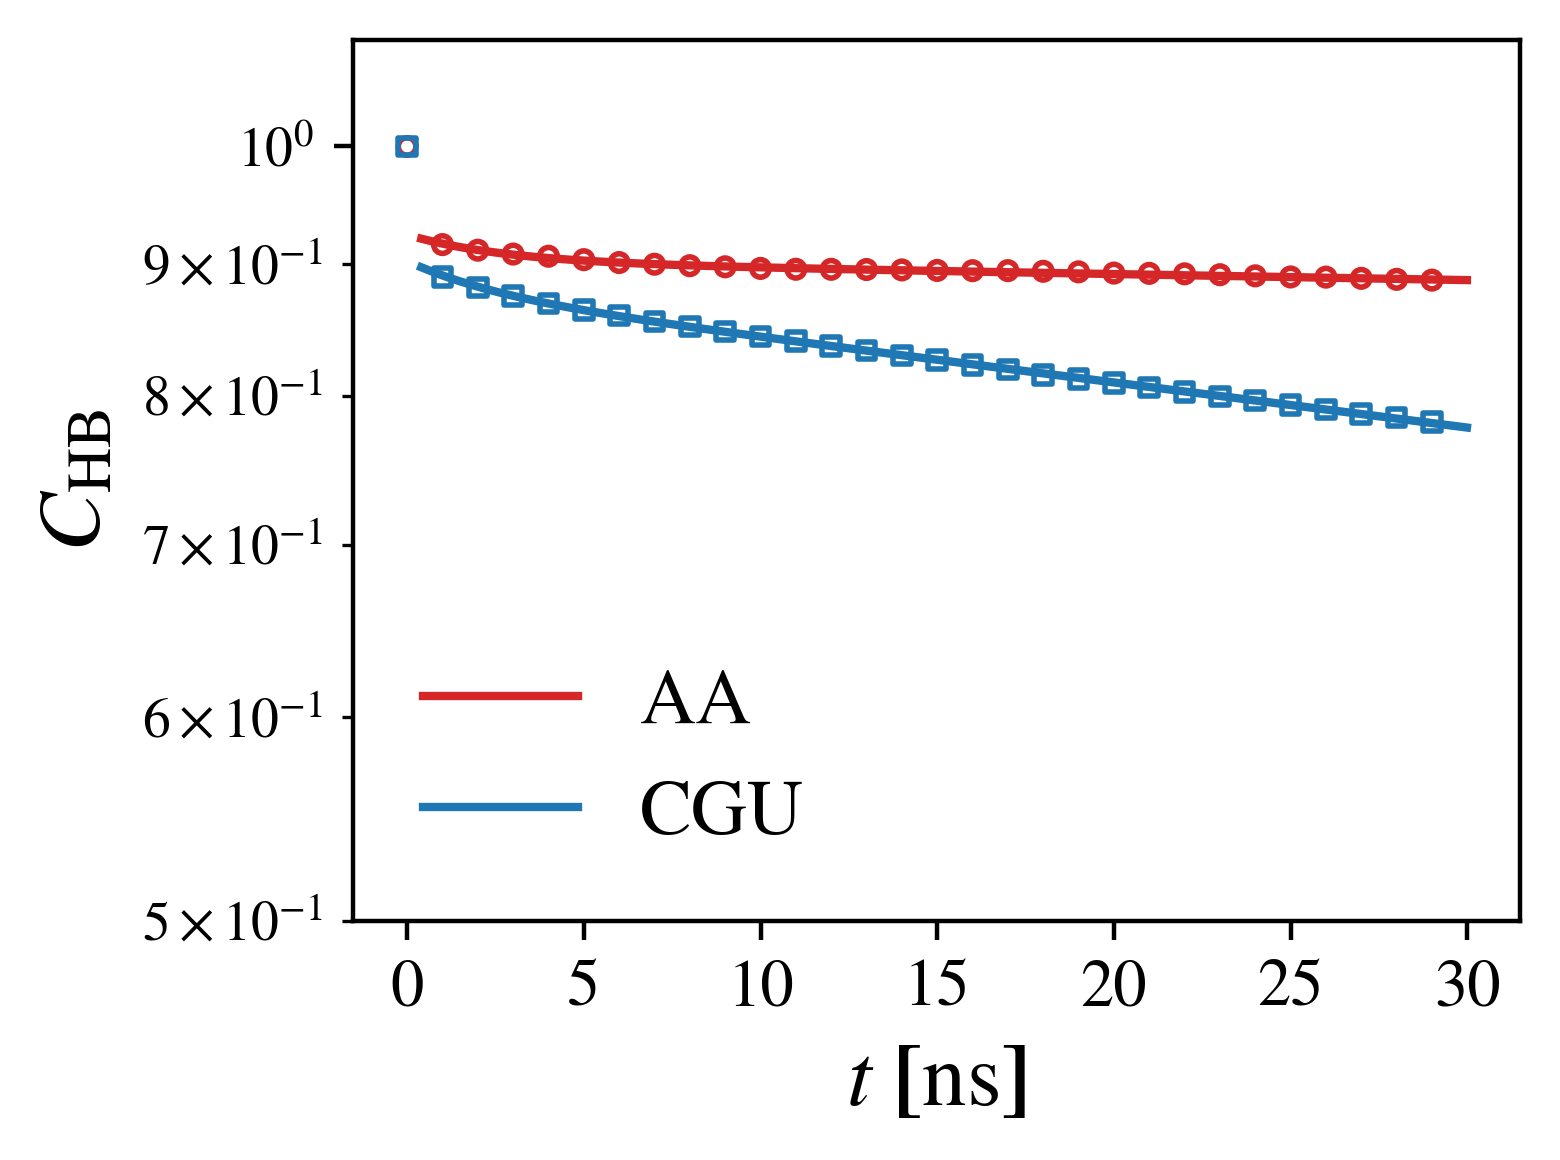

In [6]:
def cc_double_relax(x, a, b, t1, t2):
    return a * np.exp(-x / t1) + b * np.exp(-x / t2)

# plt.rcParams['mathtext.fontset'] = 'stix'
# plt.rcParams['font.family'] = 'STIXGeneral'
config = {
    "mathtext.fontset":"stix",
    "font.family":'STIXGeneral',
    "font.serif":['SimSun'],
}
from matplotlib import rcParams
rcParams.update(config)

from matplotlib.font_manager import FontProperties
SimSun = FontProperties(fname='/home/centos/anaconda3/envs/md/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/SimSun.ttf')

dpi = 400
inch_cm = 0.5
fig = plt.figure(dpi=dpi, figsize=(8 * inch_cm, 6 * inch_cm))

y_dict = dict()
# AA
h_len = 3.
h_ang = 120
title = "aa"
frames = 4000
steps = 10000
nums = 2000
start_delta = 40000
with open("data/i_%.1f_%d_%s_%d_%d_%d_%d_50chain.pkl" % (h_len, h_ang, title, steps, frames, nums, start_delta),
            "rb") as f:
    y_dict["AA"] = pkl.load(f)

# CGU new
h_len = 3.
h_ang = 120
title = "cgu"
frames = 10000
steps = 10000
nums = 2000
start_delta = 40000
with open("data/i_%.1f_%d_%s_%d_%d_%d_%d_160chain.pkl" % (h_len, h_ang, title, steps, frames, nums, start_delta),
            "rb") as f:
    y_dict["CGU"] = pkl.load(f)

# # CG new
# title = "cg"
# frames = 10000
# steps = 10000
# nums = 2000
# start_delta = 40000
# with open("data/urea_%s_%d_%d_%d_%d.pkl" % (title, steps, frames, nums, start_delta), "rb") as f:
#     y_dict["CG"] = pkl.load(f)

x = np.arange(3000) * steps / 1000000

font_size = 12

plt.yscale("log")
# plt.gca().set_yscale('log')
ecolor = {"AA": "tab:red", "CGU": "tab:blue"}
marker = {"AA": "o", "CGU": "s"}
popt = {"AA": [2.23036644e-02, 9.01740505e-01, 2.73777525e+00, 1.85752276e+03],
        "CGU": [2.47725022e-02, 8.77766313e-01, 2.56836855e+00, 2.47526086e+02]}

for k, v in y_dict.items():
    y = v[:len(x)]
    # print(len(x), x.max())
    plt.scatter(x[::100], y[::100], color='', edgecolor=ecolor[k], s=10, marker=marker[k])
    plt.plot(x[40:], cc_double_relax(x[40:], *popt[k]), label=k, color=ecolor[k])

plt.xlabel(r'$t \ \mathbf{[} \mathrm{ns} \mathbf{]}$', fontdict={"fontproperties":SimSun, "fontsize":font_size+4})
plt.ylabel('$C_\mathrm{HB}$', fontsize=font_size+4)
# plt.plot([0, 1], [100, 100])

# plt.ylim(0.7, 1.05)
# plt.xlim(0, 30)
# plt.yticks([0.7, 0.8, 0.9, 1.], [0.7, 0.8, 0.9, 1.],fontsize=font_size)
plt.xticks(fontsize=font_size)
# plt.yticks(fontsize=font_size)
plt.ylim((0.5, 1.1))
# from matplotlib.ticker import MultipleLocator, FuncFormatter
# plt.gca().yaxis.set_minor_locator(MultipleLocator(0.01))
# plt.setp(plt.gca().get_yminorticklabels(), visible=False)
plt.legend(loc="lower left",fontsize=font_size+2, frameon=False)
plt.tight_layout()
plt.savefig("2 hb_dy.jpg", dpi=dpi)
plt.show()

/home/centos/anaconda3/envs/md/lib/python3.7/site-packages/ipykernel_launcher.py:46: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


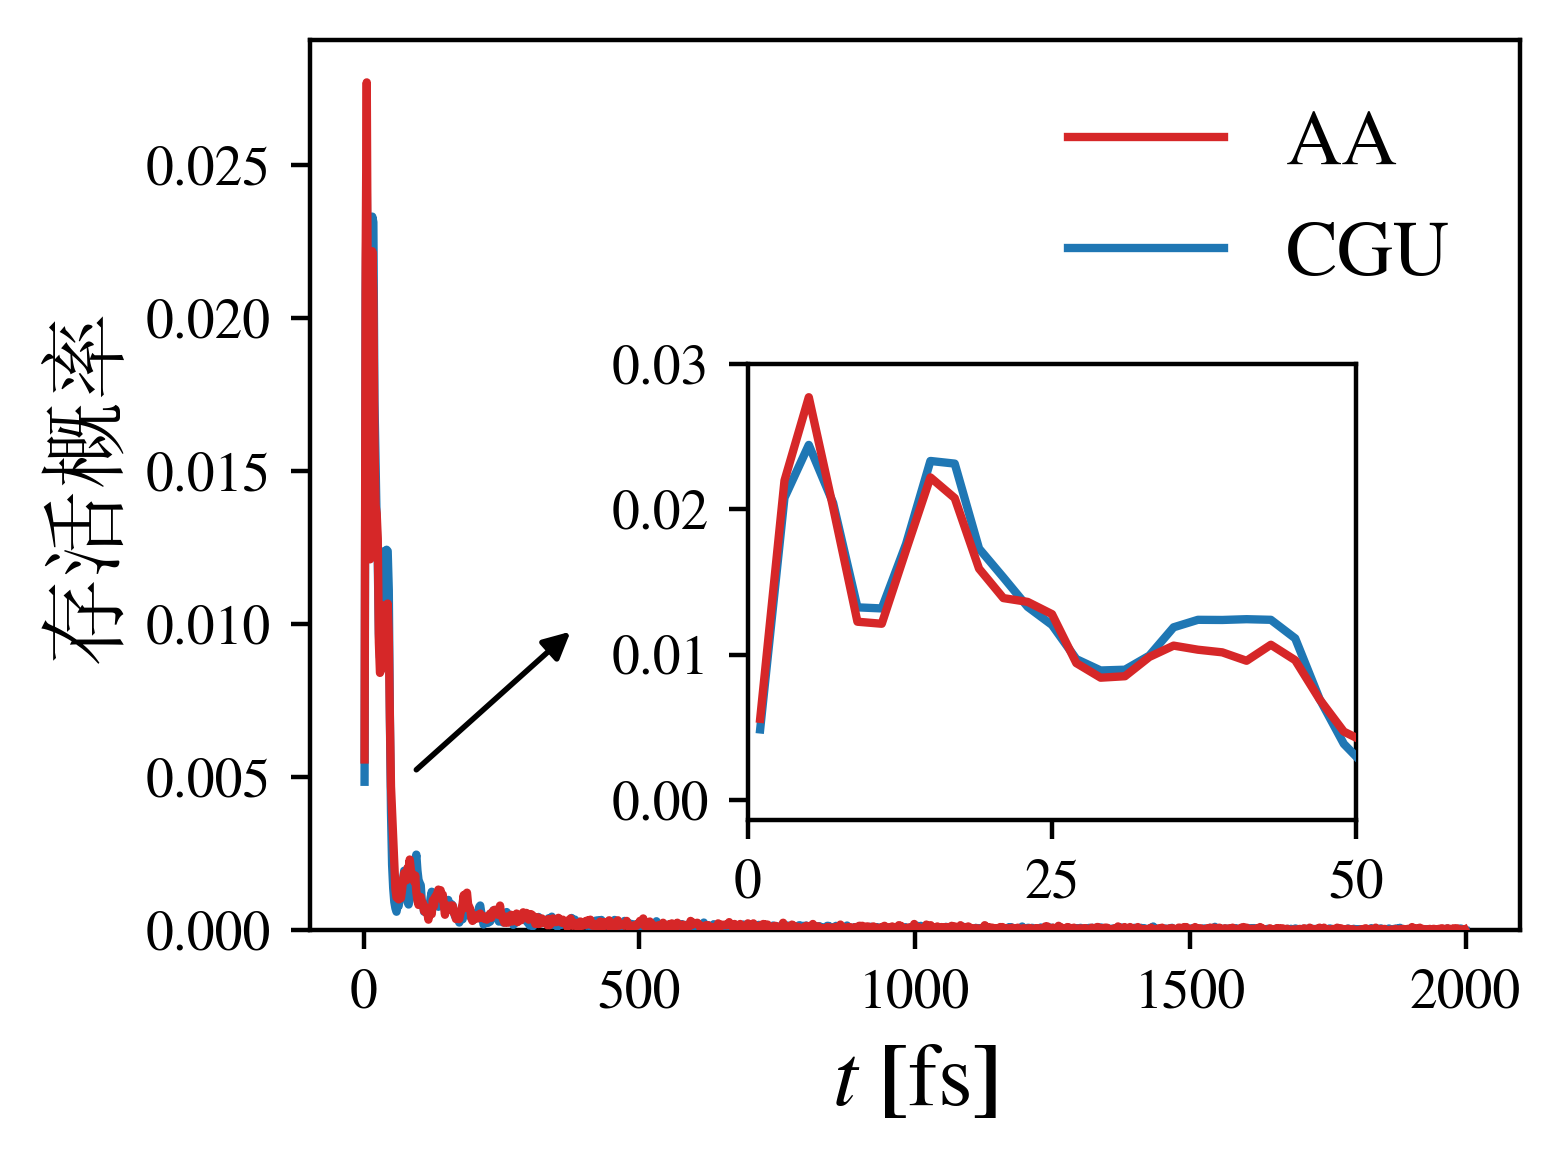

In [41]:
config = {
    "mathtext.fontset":"stix",
    "font.family":'STIXGeneral',
    "font.serif":['SimSun'],
}
from matplotlib import rcParams
rcParams.update(config)

from matplotlib.font_manager import FontProperties
SimSun = FontProperties(fname='/home/centos/anaconda3/envs/md/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/SimSun.ttf')

inch_cm = 0.5
fig = plt.figure(dpi=400, figsize=(8 * inch_cm, 6 * inch_cm))
ax = fig.add_subplot(111)
h_len = 3.
h_ang = 120
labels = ["AA", "CGU"]
# with open("data/l_%s_%d_%d_%.1f_%d_500K_%d.pkl" % ("cgu", 1, 5000, h_len, h_ang, 1), "rb") as f:
with open("data/l_%s_%d_%d_%.1f_%d_500K_%d.pkl" % ("CGU", 1, 100000, h_len, h_ang, 1), "rb") as f:
    times2 = pkl.load(f)

with open("data/l_%s_%d_%d_%.1f_%d_500K_%d.pkl" % ("aa", 1, 100000, h_len, h_ang, 0), "rb") as f:
    times1 = pkl.load(f)

values1, bins = np.histogram(times1, bins=1000, range=[0, 2000], density=True)
x = bins[:-1] + (bins[1] - bins[0]) / 2
ax.plot(x, values1, label=labels[0], color="tab:red", zorder=50)

values2, bins = np.histogram(times2, bins=1000, range=[0, 2000], density=True)
x = bins[:-1] + (bins[1] - bins[0]) / 2
ax.plot(x, values2, label=labels[1], color="tab:blue", zorder=10)
# print(x[values.argmax()])

plt.legend(loc="upper right", frameon=False, fontsize=font_size+2)
# plt.xlim(0, 50)
plt.ylim(bottom=0.)
plt.xlabel(r'$t \ \mathbf{[} \mathrm{fs} \mathbf{]}$', fontdict={"fontproperties":SimSun, "fontsize":font_size+4})
plt.ylabel(r'存活概率', fontdict={"fontproperties":SimSun, "fontsize":font_size+4})


ax.annotate("", xy=(390, 0.01), xytext=(80, 0.005),arrowprops = {"arrowstyle":"-|>", "color":"black"})
left_inset_ax = fig.add_axes([.48, .30, .38, .38])
left_inset_ax.plot(x, values1, color="tab:red", zorder=50)
left_inset_ax.plot(x, values2, color="tab:blue", zorder=10)
left_inset_ax.set(xlim=(0, 50), xticks=[0, 25, 50], yticks=[0, 0.01, 0.02,0.03])
plt.tight_layout()
plt.savefig("2 hb_lt.jpg", dpi=400)

